In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("dirty_cafe_sales.csv")

## ============ INSPECTION ============

In [3]:
# checking the first five rows of the dataframe to get the general idea of how it looks like
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


__Note : "UNKNOWN', "ERROR" are used as missing values instead of 'NaN' / 'NA'.__

In [5]:
# checking the summary statistics of each column in the dataframe
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


__Note : The counts didn't make sense. The IDs shows 10,000 rows, but rest of the columns aren't.__

In [7]:
# checking column names, useful for identifying white spaces
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [8]:
# sum up null values for each column
df.isna().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

__Note : There are lots of null values.__

In [10]:
# checking column names, non-null count, and datatypes for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


__Note : Again, null values are present. In addition to that, all columns' datatype are 'object'.__

In [12]:
# checking for duplicates
df.duplicated().sum()

0

__Data Cleaning Checklist__
    <br>1. Drop column 'Transaction ID'
    <br>2. Renaming and standardization of column names.
    <br>3. Convert "UNKNOWN", "ERROR" into 'NaN'/'NA'.
    <br>4. Fill in missing values.
    <br>5. Drop irrelevant data.

## ============ 1. DROP COLUMN 'TRANSACTION ID' ============

In [15]:
df = df.drop('Transaction ID', axis=1)

## ============ 2. RENAMING & STANDARDIZATION ============

In [17]:
df = df.rename(
    columns={
        'Item' : 'item',
        'Quantity' : 'quantity',
        'Price Per Unit' : 'price_per_unit',
        'Total Spent' : 'total_spent',
        'Payment Method' : 'payment_method',
        'Location' : 'location',
        'Transaction Date' : 'transaction_date'
    })

In [18]:
# check how the column names appear
df.head()

,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


## ============ 3. CONVERTING VALUES TO NULL VALUES ============
- 3.1 Handling 'quantity', 'price_per_unit', 'total_spent', and 'item'
- 3.2 Handling 'payment_method', and 'location'
- 3.3 Handling 'transaction_date'

### 3.1 Handling 'quantity', 'price_per_unit', 'total_spent', and 'item'

In [21]:
# convert these into the datatype 'float64'. also replacing non-convertible values into 'NaN'
df[['quantity', 'price_per_unit', 'total_spent']] = df[['quantity', 'price_per_unit', 'total_spent']].apply(pd.to_numeric, errors='coerce')

In [22]:
# check its datatype now and inspect few rows
df.dtypes

item                 object
quantity            float64
price_per_unit      float64
total_spent         float64
payment_method       object
location             object
transaction_date     object
dtype: object

In [23]:
df.head()

,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [24]:
# we can use the info from another column to fill in the missing values of another column
df['quantity'] = df['quantity'].fillna(df['total_spent'] / df['price_per_unit'])
df['price_per_unit'] = df['price_per_unit'].fillna(df['total_spent'] / df['quantity'])
df['total_spent'] = df['total_spent'].fillna(df['quantity'] * df['price_per_unit'])

In [25]:
# inspect few rows, and check the difference in the sum of missing values
df.head()

,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [26]:
df.isna().sum()

item                 333
quantity              38
price_per_unit        38
total_spent           40
payment_method      2579
location            3265
transaction_date     159
dtype: int64

In [27]:
# check why these columns still have missing values
df[df[['quantity', 'price_per_unit', 'total_spent']].isnull().any(axis=1)]

,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
65,Sandwich,3.0,NaN,NaN,NaN,In-store,2023-10-20
236,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
629,Cake,NaN,NaN,12.0,Digital Wallet,In-store,2023-12-30
641,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
912,Sandwich,NaN,NaN,20.0,ERROR,Takeaway,2023-01-05
1008,Tea,NaN,NaN,3.0,Credit Card,Takeaway,2023-03-07
1436,Tea,NaN,NaN,6.0,Cash,Takeaway,ERROR
1482,Smoothie,NaN,NaN,16.0,Cash,NaN,2023-03-05


__These rows are where at least two columns are 'NaN', missing values remain unfilled.__

In [29]:
# identifying possible unique 'price_per_unit' for an item
price_map = (
    df.dropna(subset=['price_per_unit'])
    .drop_duplicates('item')
    .set_index('item')['price_per_unit']
)

In [30]:
print(price_map)

item
Coffee      2.0
Cake        3.0
Cookie      1.0
Salad       5.0
Smoothie    4.0
UNKNOWN     3.0
Sandwich    4.0
NaN         3.0
ERROR       1.5
Juice       3.0
Tea         1.5
Name: price_per_unit, dtype: float64


__Note : Identified four possible unique 'price_per_unit'; ['coffee', 'cookie', 'salad', 'tea']__<br>
__Note : Since some price_per_unit are tied to UNKNOWN, ERROR, and NaN, filter those out.__<br>
__Note : Before proceeding, convert UNKNOWN and ERROR to NA. NaN will change to NA if datatype is converted as 'string'.__

In [32]:
# change 'item' datatype to 'string' before I can proceed handling missing values
df['item'] = df['item'].astype("string")
# check the new 'item' datatype 
df.dtypes

item                string[python]
quantity                   float64
price_per_unit             float64
total_spent                float64
payment_method              object
location                    object
transaction_date            object
dtype: object

In [33]:
# check unique values in 'item' to figure out what to replace
print(df['item'].unique())

<StringArray>
[  'Coffee',     'Cake',   'Cookie',    'Salad', 'Smoothie',  'UNKNOWN',
 'Sandwich',       <NA>,    'ERROR',    'Juice',      'Tea']
Length: 11, dtype: string


In [34]:
# convert UNKNOWN and ERROR to <NA>
df['item'] = df['item'].replace(['UNKNOWN', 'ERROR'], pd.NA)

In [35]:
print(df['item'].unique())

<StringArray>
[  'Coffee',     'Cake',   'Cookie',    'Salad', 'Smoothie',       <NA>,
 'Sandwich',    'Juice',      'Tea']
Length: 9, dtype: string


In [36]:
# check again on price_map
print(price_map)

item
Coffee      2.0
Cake        3.0
Cookie      1.0
Salad       5.0
Smoothie    4.0
UNKNOWN     3.0
Sandwich    4.0
NaN         3.0
ERROR       1.5
Juice       3.0
Tea         1.5
Name: price_per_unit, dtype: float64


In [37]:
# value counts, before we fill in 'item' based on unique 'price_per_unit'
df['item'].value_counts(dropna=False)

item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
<NA>         969
Name: count, dtype: Int64

In [38]:
# group price_per_unit with item, and return the number of unique values
unique_prices = (
    df.groupby('price_per_unit')['item']
    .nunique()
)
print(unique_prices)

price_per_unit
1.0    1
1.5    1
2.0    1
3.0    2
4.0    2
5.0    1
Name: item, dtype: int64


In [39]:
# filter in unique_prices with a value of 1
unique_prices = unique_prices[unique_prices == 1].index
print(unique_prices)

Index([1.0, 1.5, 2.0, 5.0], dtype='float64', name='price_per_unit')


In [40]:
# now we have the unique_prices, we can map it to our item.
price_to_item = (
    df[df['price_per_unit'].isin(unique_prices)]
    .dropna(subset=['item'])
    .drop_duplicates('price_per_unit')
    .set_index('price_per_unit')['item']
)
df['item'] = df['item'].fillna(df['price_per_unit'].map(price_to_item))

In [41]:
# value counts, after we fill in 'item' based on unique 'price_per_unit'
df['item'].value_counts(dropna=False)

item
Coffee      1291
Salad       1272
Cookie      1213
Tea         1207
Juice       1171
Cake        1139
Sandwich    1131
Smoothie    1096
<NA>         480
Name: count, dtype: Int64

__Note : There are increase counts in 'coffee', 'salad', 'cookie', 'tea'. NA counts are reduced. The fill-in was a success.__

In [43]:
df.isna().sum()

item                 480
quantity              38
price_per_unit        38
total_spent           40
payment_method      2579
location            3265
transaction_date     159
dtype: int64

In [44]:
# create a mapping item_to_price
valid = df.dropna(subset=['price_per_unit'])
item_to_price = (
    valid.groupby('item')['price_per_unit']
    .first()
    .to_dict()
)
item_to_price

{'Cake': 3.0,
 'Coffee': 2.0,
 'Cookie': 1.0,
 'Juice': 3.0,
 'Salad': 5.0,
 'Sandwich': 4.0,
 'Smoothie': 4.0,
 'Tea': 1.5}

In [45]:
# based on the mapping, fill in all missing values in price_per_unit
df['price_per_unit'] = df['price_per_unit'].fillna(df['item'].map(item_to_price))

In [46]:
# check how is it looking now
df[df[['quantity', 'price_per_unit', 'total_spent']].isnull().any(axis=1)]

,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
65,Sandwich,3.0,4.0,NaN,NaN,In-store,2023-10-20
236,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
629,Cake,NaN,3.0,12.0,Digital Wallet,In-store,2023-12-30
641,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
912,Sandwich,NaN,4.0,20.0,ERROR,Takeaway,2023-01-05
1008,Tea,NaN,1.5,3.0,Credit Card,Takeaway,2023-03-07
1436,Tea,NaN,1.5,6.0,Cash,Takeaway,ERROR
1482,Smoothie,NaN,4.0,16.0,Cash,NaN,2023-03-05


__Note : Now that 'price_per_unit' are filled, except missing values in 'item', we can re-run column operations to fill in 'quantity' and 'total_spent'__

In [48]:
# re-run column operations to fill in more missing values
df['quantity'] = df['quantity'].fillna(df['total_spent'] / df['price_per_unit'])
df['price_per_unit'] = df['price_per_unit'].fillna(df['total_spent'] / df['quantity'])
df['total_spent'] = df['total_spent'].fillna(df['quantity'] * df['price_per_unit'])

In [49]:
# check how it is looking now
df[df[['quantity', 'price_per_unit', 'total_spent']].isnull().any(axis=1)]

,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
236,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
1761,<NA>,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
2289,<NA>,4.0,NaN,NaN,ERROR,NaN,2023-12-09
2796,Cake,NaN,3.0,NaN,Credit Card,NaN,2023-12-01
3203,Smoothie,NaN,4.0,NaN,Digital Wallet,Takeaway,2023-10-06
3224,Coffee,NaN,2.0,NaN,NaN,NaN,2023-04-07
3401,Tea,NaN,1.5,NaN,Digital Wallet,In-store,2023-07-25


__Note : These rows can be dropped, since there is no way to fill in those missing values__

In [51]:
# drop all the above rows, keeping rows with at least 3 non-missing values
df = df.dropna(subset=['item', 'quantity', 'price_per_unit', 'total_spent'], thresh=3)

In [52]:
# just to check
df[df[['quantity', 'price_per_unit', 'total_spent']].isnull().any(axis=1)]

,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date


__Note : We have dropped all the rows with unfillable missing values.__

In [54]:
# now to check the next column with missing values
df.isna().sum()

item                 474
quantity               0
price_per_unit         0
total_spent            0
payment_method      2570
location            3257
transaction_date     159
dtype: int64

In [55]:
# just want to check what is wrong with column 'item'
df[df[['item']].isnull().any(axis=1)]

,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
6,<NA>,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
8,<NA>,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
36,<NA>,4.0,3.0,12.0,NaN,In-store,2023-07-17
61,<NA>,1.0,3.0,3.0,NaN,In-store,2023-10-09
69,<NA>,5.0,3.0,15.0,Digital Wallet,In-store,2023-04-06
...,...,...,...,...,...,...,...
9910,<NA>,2.0,3.0,6.0,Digital Wallet,UNKNOWN,2023-01-12
9918,<NA>,1.0,4.0,4.0,Digital Wallet,Takeaway,2023-03-04
9946,<NA>,1.0,4.0,4.0,Cash,Takeaway,2023-09-24
9981,<NA>,5.0,4.0,20.0,Digital Wallet,NaN,2023-02-27


__Note : These rows are where the item is missing, and the price_per_unit is not unique.__

### 3.2 Handling 'payment_method', and 'location'

In [58]:
# standardizing all missing values as "UNKNOWN"
df[['payment_method', 'location']] = (
    df[['payment_method', 'location']].replace(['NaN', 'ERROR', pd.NA], 'UNKNOWN')
    .fillna('UNKNOWN')
)

In [59]:
# check on how these two columns appear now
df['payment_method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet'], dtype=object)

In [60]:
df['location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN'], dtype=object)

### 3.3 Handling 'transaction_date'

In [62]:
# conversion to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

In [63]:
# drop rows with missing values
df = df.dropna(subset=['transaction_date'])

In [64]:
# splitting into three columns 'year', 'month', 'day'
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day
df.drop(['transaction_date'], axis=1)

,item,quantity,price_per_unit,total_spent,payment_method,location,year,month,day
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023,9,8
1,Cake,4.0,3.0,12.0,Cash,In-store,2023,5,16
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023,7,19
3,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023,4,27
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023,6,11
...,...,...,...,...,...,...,...,...,...
9995,Coffee,2.0,2.0,4.0,UNKNOWN,UNKNOWN,2023,8,30
9996,Cookie,3.0,1.0,3.0,Digital Wallet,UNKNOWN,2023,6,2
9997,Coffee,4.0,2.0,8.0,Digital Wallet,UNKNOWN,2023,3,2
9998,Cookie,3.0,1.0,3.0,Digital Wallet,UNKNOWN,2023,12,2


## ============ 4. ANALYSIS ============

### Mean, Median, Mode, Standard Deviation, Range

In [67]:
# most bought 'item'
df['item'].value_counts()

item
Coffee      1241
Salad       1214
Cookie      1149
Tea         1141
Juice       1121
Cake        1081
Sandwich    1071
Smoothie    1046
Name: count, dtype: Int64

In [68]:
# analysis on column 'quantity'
mean_quantity = df['quantity'].mean()
print(f"Average Quantity: {mean_quantity}")
med_quantity = df['quantity'].median()
print(f"Median Quantity: {med_quantity}")

Average Quantity: 3.0212318688248896
Median Quantity: 3.0


In [69]:
# analysis on column 'total_spent'
mean_spent = df['total_spent'].mean()
print(f"Average Spendings: {mean_spent}")
med_spent = df['total_spent'].median()
print(f"Median Spendings: {med_spent}")

Average Spendings: 8.920380491906664
Median Spendings: 8.0


In [70]:
# average 'total_spent' grouped by 'item
avg_spent_by_item = df.groupby(['item']).total_spent.mean()
print(round(avg_spent_by_item, 2))

item
Cake         9.10
Coffee       6.07
Cookie       2.98
Juice        8.94
Salad       15.01
Sandwich    12.20
Smoothie    12.21
Tea          4.52
Name: total_spent, dtype: float64


In [71]:
# sum of 'total_spent' by month
sum_spent_by_month = df.groupby(['month']).total_spent.sum()
print(sum_spent_by_month)

month
1     7254.0
2     6644.0
3     7216.0
4     7179.0
5     6932.5
6     7353.0
7     6877.5
8     7092.5
9     6871.0
10    7314.0
11    6967.0
12    7168.0
Name: total_spent, dtype: float64


In [72]:
# sum of 'total_spent' by 'month' and 'item'
sum_spent_by_item_month = df.groupby(['month', 'item']).total_spent.sum()
print(sum_spent_by_item_month)

month  item    
1      Cake         855.0
       Coffee       592.0
       Cookie       292.0
       Juice        918.0
       Salad       1665.0
                    ...  
12     Juice        936.0
       Salad       1395.0
       Sandwich    1020.0
       Smoothie    1172.0
       Tea          414.0
Name: total_spent, Length: 96, dtype: float64


## ============ 5. VISUALISATIONS ============

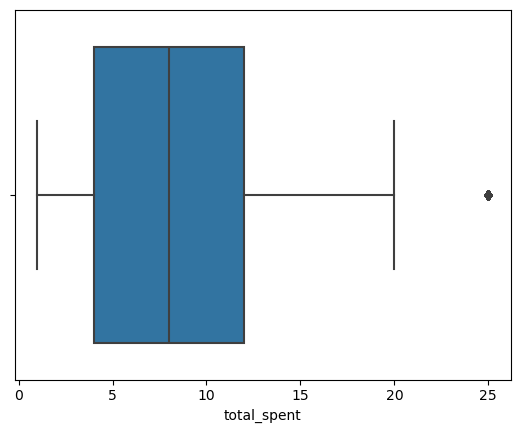

In [130]:
# visualising
sns.boxplot(x='total_spent', data=df)
plt.show()
plt.close()